C:\Users\Alpaca_YT\anaconda3\envs\mphy0041-cw2-pt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Alpaca_YT\anaconda3\envs\mphy0041-cw2-pt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Alpaca_YT\anaconda3\envs\mphy0041-cw2-pt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Alpaca_YT\anaconda3\envs\mphy0041-cw2-pt\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Alpaca_YT\anaconda3\envs\mphy0041-cw2-pt\Lib\site-packa

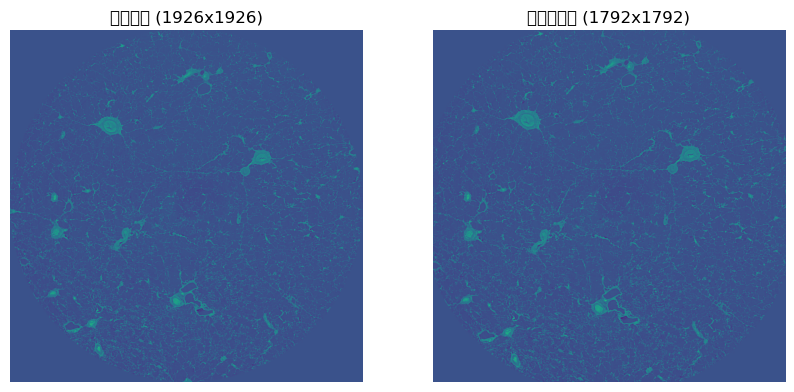

裁剪后的图像已保存为 'Cropped_img01576.png'


In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def center_crop_image(image, target_width, target_height):
    """
    将输入的Pillow图像对象裁剪为中心的指定尺寸。
    
    参数:
    image (PIL.Image.Image): Pillow 图像对象。
    target_width (int): 目标宽度 (x)。
    target_height (int): 目标高度 (y)。
    
    返回:
    PIL.Image.Image: 裁剪后的图像对象。
    """
    # 获取原始图像尺寸
    original_width, original_height = image.size

    # 计算裁剪框的左上角坐标
    left = (original_width - target_width) / 2
    top = (original_height - target_height) / 2

    # 计算裁剪框的右下角坐标
    right = (original_width + target_width) / 2
    bottom = (original_height + target_height) / 2

    # 确保坐标是整数
    crop_box = (int(left), int(top), int(right), int(bottom))
    
    # 执行裁剪
    cropped_image = image.crop(crop_box)
    
    return cropped_image

# --- 示例用法 ---

# 1. 为了让这个 cell 能独立运行，我们先创建一个虚拟的输入图像
#    在实际使用中，你可以用 Image.open('你的图片路径.jpg') 来加载真实图片
try:
    # 尝试加载一张本地图片，如果不存在，则创建虚拟图片
    input_image = Image.open(r"test1/image_01576.png") 
except FileNotFoundError:
    print("未找到'your_input_image.jpg'，将创建一个500x400的虚拟渐变图像用于演示。")
    # 创建一个渐变图像作为示例
    gradient = np.linspace(0, 255, 500, dtype=np.uint8)
    gradient_2d = np.tile(gradient, (400, 1))
    input_image = Image.fromarray(gradient_2d, 'L').convert('RGB')


# 2. 设置你想要的目标尺寸 (x * y)
target_x = 1792  # 目标宽度
target_y = 1792  # 目标高度

# 3. 调用函数进行裁剪
cropped_img = center_crop_image(input_image, target_x, target_y)

# 4. 显示原始图像和裁剪后的图像进行对比
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title(f"原始图像 ({input_image.width}x{input_image.height})")
plt.imshow(input_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title(f"中心裁剪后 ({cropped_img.width}x{cropped_img.height})")
plt.imshow(cropped_img)
plt.axis('off')

plt.show()

# 5. 如果需要，保存裁剪后的图像
cropped_img.save(r"test1/Cropped_img01576.png")
print("裁剪后的图像已保存为 'Cropped_img01576.png'")